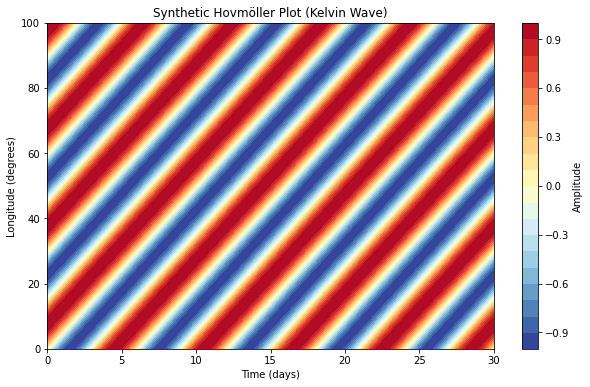

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters for the synthetic data
# Time and space axis
time = np.linspace(0, 30, 300)  # 30 days, 300 time steps
space = np.linspace(0, 100, 200)  # 100 degrees longitude, 200 space steps

# Create a 2D grid for space and time
T, X = np.meshgrid(time, space)

# Set parameters for the wave (Kelvin wave)
wave_number = 2 * np.pi / 30  # wave number (cycles per 30 degrees longitude)
phase_speed = 5  # phase speed in degrees per day

# Generate the Kelvin wave pattern as a function of space and time
wave = np.sin(wave_number * (X - phase_speed * T))

# Plot the synthetic Hovmöller plot
plt.figure(figsize=(10, 6))
plt.contourf(time, space, wave, levels=20, cmap='RdYlBu_r')
plt.colorbar(label='Amplitude')
plt.title('Synthetic Hovmöller Plot (Kelvin Wave)')
plt.xlabel('Time (days)')
plt.ylabel('Longitude (degrees)')
plt.show()


Estimated Phase Speed: 0.04 degrees per day


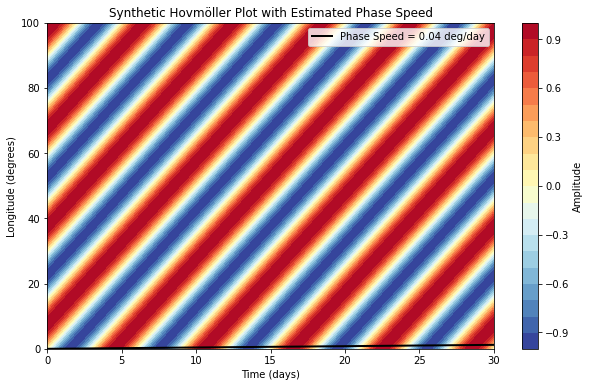

In [3]:
# Function to estimate phase speed
def estimate_phase_speed(T, X, wave_data, threshold=0.5):
    # Find the position of the wave peaks (where wave amplitude exceeds a threshold)
    peak_positions = []
    
    for i in range(wave_data.shape[1]):  # Loop over each time step
        # Find the indices where wave amplitude is near the threshold value
        indices = np.where(wave_data[:, i] > threshold)[0]
        
        if len(indices) > 0:
            # Get the mean position of these indices
            mean_position = np.mean(X[indices, i])
            peak_positions.append(mean_position)
        else:
            peak_positions.append(np.nan)
    
    peak_positions = np.array(peak_positions)
    time_points = T[0, :]
    
    # Compute phase speed as the slope of the line (distance/time)
    valid_positions = ~np.isnan(peak_positions)  # Exclude NaN values
    slope = np.polyfit(time_points[valid_positions], peak_positions[valid_positions], 1)[0]
    
    return slope

# Estimate phase speed from the synthetic data
# Estimate phase speed from the synthetic data
estimated_phase_speed = estimate_phase_speed(T, X, wave)

# Print the estimated phase speed
print(f"Estimated Phase Speed: {estimated_phase_speed:.2f} degrees per day")

# Plot the wave peaks to visualize the phase speed line
plt.figure(figsize=(10, 6))
plt.contourf(time, space, wave, levels=20, cmap='RdYlBu_r')

# Now use the estimated phase speed result, not the function name itself
plt.plot(time, estimated_phase_speed * time, color='black', lw=2, label=f'Phase Speed = {estimated_phase_speed:.2f} deg/day')

plt.colorbar(label='Amplitude')
plt.title('Synthetic Hovmöller Plot with Estimated Phase Speed')
plt.xlabel('Time (days)')
plt.ylabel('Longitude (degrees)')
plt.legend()
plt.show()
